Cleaning taxi_rides dataset

In [1]:
%matplotlib inline

In [2]:
# load geo modules
import geopandas as gpd
import contextily as ctx
import geoplot

In [3]:
# load necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load New York city complete geometry to have as a reference
NYC = gpd.read_file(r"C:\Users\chpol\Documents\PM\Data\GIS\NYC\nyc.shp") 

In [5]:
#check New York City Boundaries
NYC.bounds

,minx,miny,maxx,maxy
0,-74.255591,40.496115,-73.700009,40.915533


In [6]:
# load clean taxi rides we have previously cleand from othe points of view
rides = pd.read_csv('clean_rides.csv')

In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041861 entries, 0 to 1041860
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1041861 non-null  object 
 1   vendor_id           1041861 non-null  int64  
 2   pickup_datetime     1041861 non-null  object 
 3   dropoff_datetime    1041861 non-null  object 
 4   passenger_count     1041861 non-null  int64  
 5   pickup_longitude    1041861 non-null  float64
 6   pickup_latitude     1041861 non-null  float64
 7   dropoff_longitude   1041861 non-null  float64
 8   dropoff_latitude    1041861 non-null  float64
 9   store_and_fwd_flag  1041861 non-null  object 
 10  duration            1041861 non-null  int64  
 11  distance            1041861 non-null  float64
 12  test_distance       1041861 non-null  float64
 13  pick_up             1041861 non-null  object 
 14  drop_off            1041861 non-null  object 
 15  test_duration_m

In [8]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,test_distance,pick_up,drop_off,test_duration_min,test_duration_sec,price,duration_distance
0,id2360649,1,2016-03-16 17:49:00,2016-03-16 17:49:00,1,-73.985603,40.756092,-73.985596,40.756100,N,5,0.001057,0.001064,"(40.75609207, -73.98560333)","(40.7560997, -73.9855957)",0.000266,0.015965,10.026429,15.102081
1,id2433071,1,2016-05-18 06:22:00,2016-05-18 06:23:00,1,-73.902016,40.763908,-73.902023,40.763916,N,81,0.001061,0.001064,"(40.76390839, -73.90201569)","(40.76391602, -73.90202332)",0.000266,0.015965,10.026535,15.040909
2,id2678425,1,2016-04-13 21:45:00,2016-04-13 21:45:00,1,-73.983345,40.760666,-73.983337,40.760658,N,2,0.001061,0.001064,"(40.76066589, -73.98334503)","(40.76065826, -73.98333740000002)",0.000266,0.015965,10.026535,15.041177
3,id1573649,1,2016-04-09 02:39:00,2016-04-09 02:39:00,1,-73.976166,40.719170,-73.976158,40.719177,N,6,0.001061,0.001065,"(40.71916962, -73.97616577)","(40.71917725, -73.97615814)",0.000266,0.015968,10.026535,15.044599
4,id0335718,2,2016-01-25 23:49:00,2016-01-25 23:49:00,5,-73.794441,40.656239,-73.794449,40.656231,N,19,0.001061,0.001065,"(40.65623856, -73.79444122)","(40.65623093, -73.79444885)",0.000266,0.015974,10.026535,15.049787


In [9]:
invalid_geo = rides.query('pickup_latitude < 40.496115 | pickup_latitude > 40.915533 | pickup_longitude < -74.255591 | pickup_longitude > -73.700009')

In [10]:
invalid_geo

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,test_distance,pick_up,drop_off,test_duration_min,test_duration_sec,price,duration_distance


In [11]:
#drop invalid_geo records
records_to_drop = rides.iloc[invalid_geo.index]
len(records_to_drop)

0

In [12]:
s_rides = rides.sample(10000)

In [13]:
s_rides.to_csv('s_rides.csv', index=False)

In [ ]:
s_rides.pickup_datetime.min()

In [ ]:
rides.pickup_datetime.min()

In [ ]:
s_rides.pickup_datetime.max()

In [ ]:
rides.pickup_datetime.max()

In [ ]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()

In [ ]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()

In [ ]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['duration'].plot(kind = 'bar');

In [ ]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['distance'].plot(kind = 'bar');

In [ ]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['passenger_count'].plot(kind = 'bar');

In [ ]:
min(rides.pickup_longitude.min(), rides.dropoff_longitude.min())

In [ ]:
max(rides.pickup_longitude.max(), rides.dropoff_longitude.max())

In [ ]:
min(rides.pickup_latitude.min(), rides.dropoff_latitude.min())

In [ ]:
max(rides.pickup_latitude.max(), rides.dropoff_latitude.max())

In [ ]:
BBox = (min(rides.pickup_longitude.min(), rides.dropoff_longitude.min()), max(rides.pickup_longitude.max(), rides.dropoff_longitude.max()),
        min(rides.pickup_latitude.min(), rides.dropoff_latitude.min()), max(rides.pickup_latitude.max(), rides.dropoff_latitude.max()))

In [ ]:
BBox

In [ ]:
map = plt.imread('map.png')

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(rides.pickup_longitude, rides.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Pickup Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal');

In [ ]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(rides.dropoff_longitude, rides.dropoff_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Dropoff Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal');

In [ ]:
gdf = df.to_crs(epsg=3857)

In [45]:
#load New York city complete geometry to have as a reference
NYC = gpd.read_file(r"C:\Users\chpol\Documents\PM\Data\GIS\NYC\nyc.shp") 

In [46]:
#check Coordinate Reference System
NYC.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [47]:
#check New York City Boundaries
NYC.bounds

,minx,miny,maxx,maxy
0,-74.255591,40.496115,-73.700009,40.915533


In [48]:
NYC.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,0.0,New_York_City,5.400502e+07,39247.227831,"MULTIPOLYGON (((-73.96929 40.70709, -73.96962 ..."


In [8]:
rides = pd.read_csv('taxi_rides_copy.csv')

In [9]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,id3487442,2,2/29/16 18:39,2/29/16 18:42,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0,NaN,NaN,NaN
1,id1145809,2,5/16/16 23:15,5/16/16 23:31,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0,NaN,NaN,NaN
2,id3499387,1,1/25/16 19:45,1/25/16 19:54,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0,NaN,NaN,NaN
3,id0753277,1,1/27/16 22:29,1/27/16 22:29,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0,NaN,NaN,NaN
4,id2134482,1,1/22/16 16:13,1/22/16 16:13,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0,NaN,NaN,NaN


In [12]:
invalid_geo = rides.query('pickup_latitude < 40.496115 | pickup_latitude > 40.915533 | pickup_longitude < -74.255591 | pickup_longitude > -73.700009')

In [26]:
#drop invalid_geo records
records_to_drop = rides.iloc[invalid_geo.index]
len(records_to_drop)

215

In [27]:
rides.drop(records_to_drop.index, axis = 0, inplace = True)

In [29]:
rides.to_csv('rides.csv', index = False)

In [33]:
rides.shape

(1048253, 15)

In [13]:
rides_point.crs == nyc_poly.crs

True

In [15]:
invalid_geo.shape

(215, 15)

In [25]:
invalid_geo.to_csv('invalid_geo.csv', index = False)

In [20]:
invalid_deodataframe = gpd.GeoDataFrame(invalid_geo, crs="EPSG:4326", geometry=gpd.points_from_xy(invalid_geo.pickup_longitude, invalid_geo.pickup_latitude)) #create a GeoDataFrame

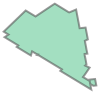

In [24]:
nyc_poly.geometry[0]

In [16]:
nyc_poly.head(1)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,3.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"POLYGON ((-73.97605 40.63128, -73.97717 40.630..."


In [26]:
nyc_poly.iloc[0,:]

boro_code                                                     3
boro_name                                              Brooklyn
county_fip                                                  047
ntacode                                                    BK88
ntaname                                            Borough Park
shape_area                                           5.4005e+07
shape_leng                                              39247.2
geometry      POLYGON ((-73.97604935657381 40.63127590564677...
Name: 0, dtype: object

In [28]:
rides_point.within(nyc_poly.geometry[0]).sum()

19

In [37]:
len(nyc_poly.geometry)

195

In [35]:
nyc_poly.geometry

0      POLYGON ((-73.97605 40.63128, -73.97717 40.630...
1      POLYGON ((-73.80379 40.77561, -73.80099 40.775...
2      POLYGON ((-73.86110 40.76366, -73.85993 40.762...
3      POLYGON ((-73.94826 40.63861, -73.94923 40.638...
4      POLYGON ((-73.75726 40.71814, -73.75589 40.716...
                             ...                        
190    MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...
191    POLYGON ((-74.00702 40.63211, -74.00634 40.631...
192    POLYGON ((-74.03267 40.64372, -74.03261 40.643...
193    POLYGON ((-74.15379 40.61226, -74.15372 40.612...
194    POLYGON ((-74.09777 40.61062, -74.09730 40.610...
Name: geometry, Length: 195, dtype: geometry

In [45]:
nyc_poly.iloc[190,:]

boro_code                                                     2
boro_name                                                 Bronx
county_fip                                                  005
ntacode                                                    BX39
ntaname                                  Mott Haven-Port Morris
shape_area                                          4.18986e+07
shape_leng                                              35603.7
geometry      (POLYGON ((-73.89680883223774 40.7958084451597...
taxi_rides                                                    0
Name: 190, dtype: object

In [47]:
NYC

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
0,4.0,Brooklyn,047,BK88,Borough Park,5.400502e+07,39247.227831,"MULTIPOLYGON (((-73.96929 40.70709, -73.96962 ..."
